DEEP LEARNING MODEL TO PREDICT HOUSE PRICES

In [1]:
#king county(city in seattle USA) map is used 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 720x432 with 0 Axes>

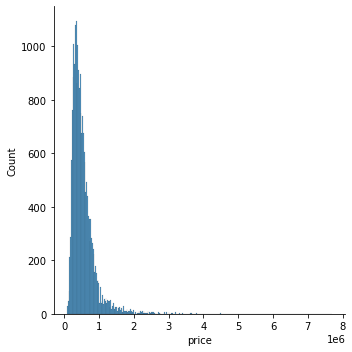

In [7]:
plt.figure(figsize = (10,6))
sns.displot(df['price'])


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

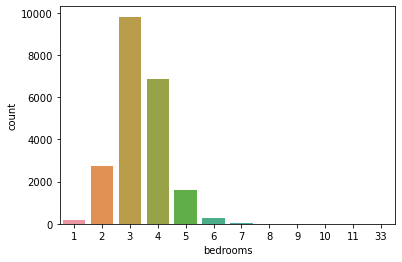

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [10]:
df.corr()['price'].sort_values

<bound method Series.sort_values of id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64>

<AxesSubplot:>

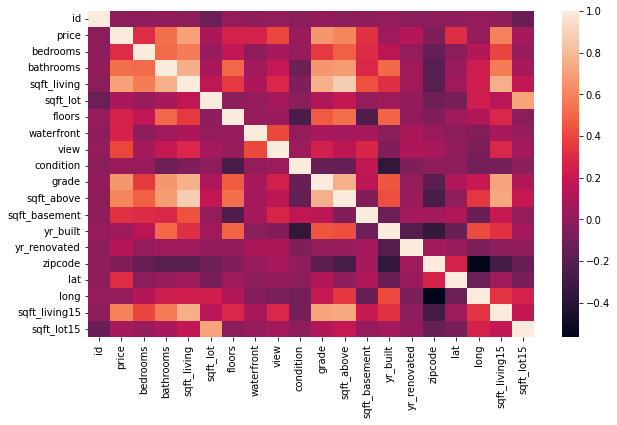

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

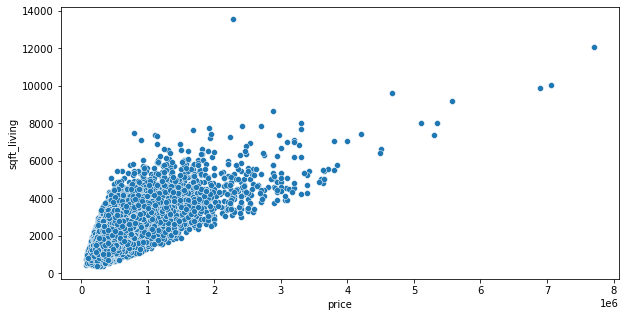

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

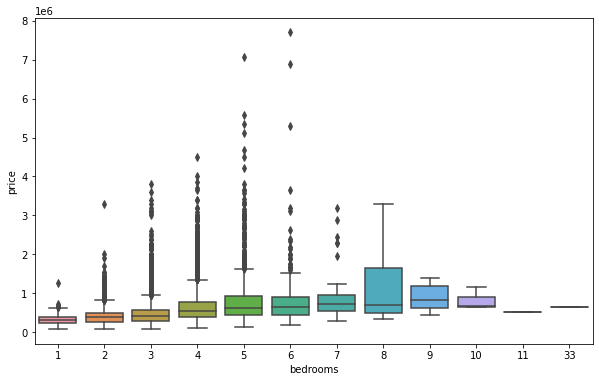

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='long'>

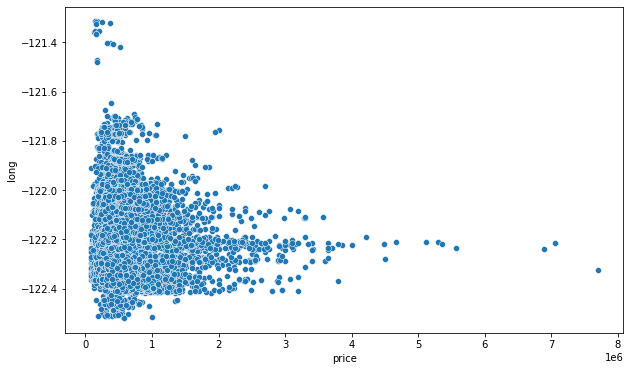

In [15]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

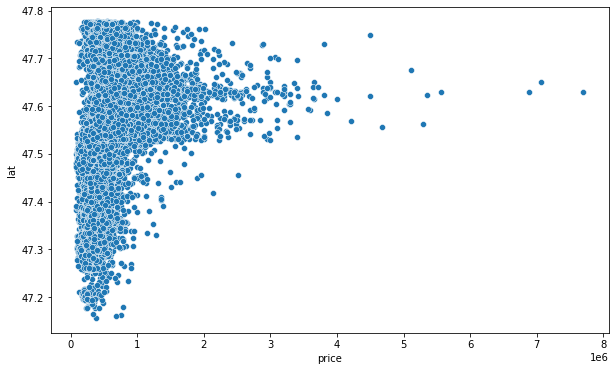

In [16]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

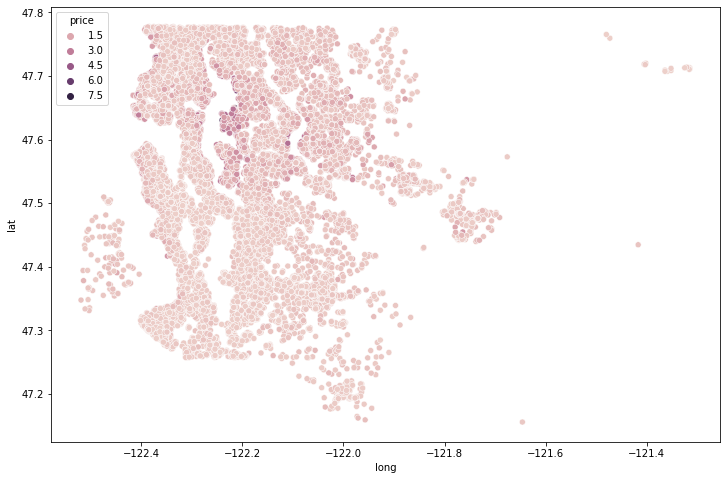

In [17]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='long',y='lat',hue = 'price'
                ,data=df)

In [18]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [19]:
len(df)

21597

In [20]:
non_top_1_per = df.sort_values('price',ascending=False).iloc[216:]

In [21]:
len(non_top_1_per)

21381

<AxesSubplot:xlabel='long', ylabel='lat'>

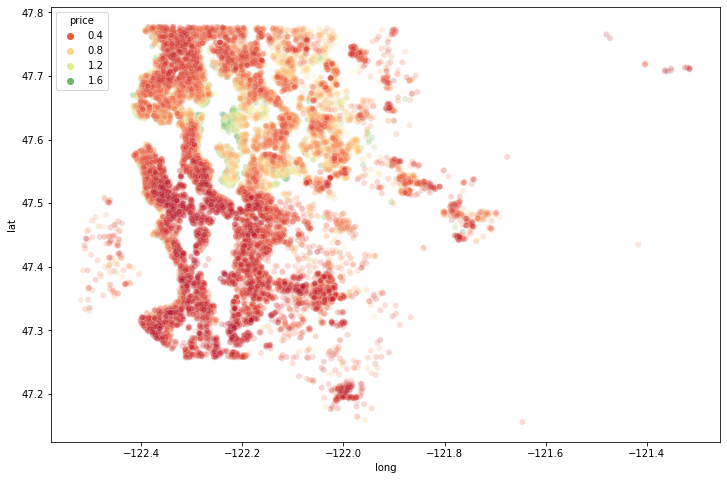

In [22]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='long',y='lat',hue = 'price',alpha=0.2
                ,data=non_top_1_per,palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

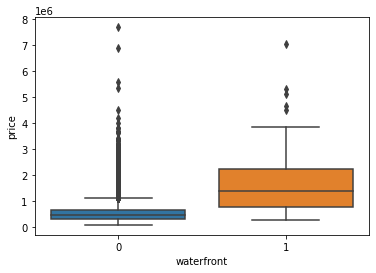

In [23]:
sns.boxplot(x='waterfront',y='price',data=df)

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [25]:
df = df.drop('date',axis=1)

In [26]:
df = df.drop('id',axis=1)

In [27]:
df = df.drop('zipcode',axis=1)

In [28]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [29]:
X = df.drop('price',axis=1).values
Y = df['price'].values

In [30]:
#.values returns the numpy array 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(X_train)

MinMaxScaler()

In [36]:
#we don't fit scaler to test set as we don't want to assume prior information to the test set

In [37]:
X_train = scaler.transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense

In [41]:
X_train.shape

(15117, 19)

In [42]:
model = Sequential()

In [43]:
#layers should be allocated according to shape 

In [44]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam',loss='mse')

In [45]:
model.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),
          batch_size=128,epochs=400)

2022-05-14 22:02:56.659627: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-14 22:02:56.660879: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 88us/sample - loss: 430241845906.6873 - val_loss: 418926713282.0543
Epoch 2/400
15117/15117 [==============================] - 0s 24us/sample - loss: 429332950267.5123 - val_loss: 415755191283.3580
Epoch 3/400
15117/15117 [==============================] - 0s 30us/sample - loss: 416367047108.2209 - val_loss: 385796922684.0494
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 351273179268.3607 - val_loss: 278442425882.5482
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 209148981099.7886 - val_loss: 131929129485.9062
Epoch 6/400
15117/15117 [==============================] - 0s 21us/sample - loss: 110508791895.1115 - val_loss: 95913026749.6296
Epoch 7/400
15117/15117 [==============================] - 0s 21us/sample - loss: 98304093100.3432 - val_loss: 94246307743.9210
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 30us/sample - loss: 33674870319.4507 - val_loss: 32365801386.0346
Epoch 128/400
15117/15117 [==============================] - 0s 26us/sample - loss: 33652556245.0878 - val_loss: 32374341171.8321
Epoch 129/400
15117/15117 [==============================] - 0s 25us/sample - loss: 33595858247.9212 - val_loss: 32265385695.7630
Epoch 130/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33579445825.7400 - val_loss: 32328847628.0099
Epoch 131/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33584205384.7171 - val_loss: 32198101654.4395
Epoch 132/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33506502301.7287 - val_loss: 32166539466.2716
Epoch 133/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33442720364.3474 - val_loss: 32142212998.6370
Epoch 134/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33462488654.6103 - v

15117/15117 [==============================] - 0s 25us/sample - loss: 31003117261.1455 - val_loss: 29104497282.2123
Epoch 254/400
15117/15117 [==============================] - 0s 25us/sample - loss: 30990626130.2851 - val_loss: 29116543299.6346
Epoch 255/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30930454180.5025 - val_loss: 29109821996.2469
Epoch 256/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30938727467.2170 - val_loss: 29081395012.8988
Epoch 257/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30915607433.3902 - val_loss: 29043078227.4370
Epoch 258/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30890737708.7073 - val_loss: 29082191108.4247
Epoch 259/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30879821865.9639 - val_loss: 29074137199.2494
Epoch 260/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30867075267.6282 - v

15117/15117 [==============================] - 0s 27us/sample - loss: 29803613534.4103 - val_loss: 27761602388.0691
Epoch 380/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29797755536.1133 - val_loss: 27685101729.8173
Epoch 381/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29815187895.3507 - val_loss: 27671708224.4741
Epoch 382/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29777209342.6452 - val_loss: 27700232343.7037
Epoch 383/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29840691150.5510 - val_loss: 27646574506.0346
Epoch 384/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29762513293.2174 - val_loss: 27662659128.8889
Epoch 385/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29770715494.4711 - val_loss: 27656932187.6543
Epoch 386/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29796591239.6798 - v

In [46]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

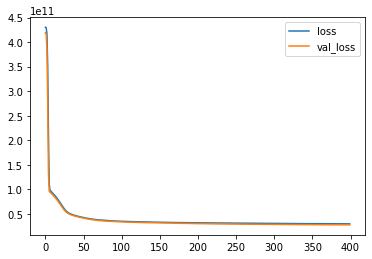

In [47]:
losses.plot()

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([[398112.34],
       [603903.94],
       [583865.5 ],
       ...,
       [386304.4 ],
       [572904.7 ],
       [694673.44]], dtype=float32)

In [53]:
mean_absolute_error(Y_test,predictions)

103215.06282552083

In [54]:
mean_squared_error(Y_test,predictions)

27639845471.34212

In [55]:
mean_squared_error(Y_test,predictions)**0.5

166252.3547843522

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [58]:
explained_variance_score(Y_test,predictions)

0.792426408687427

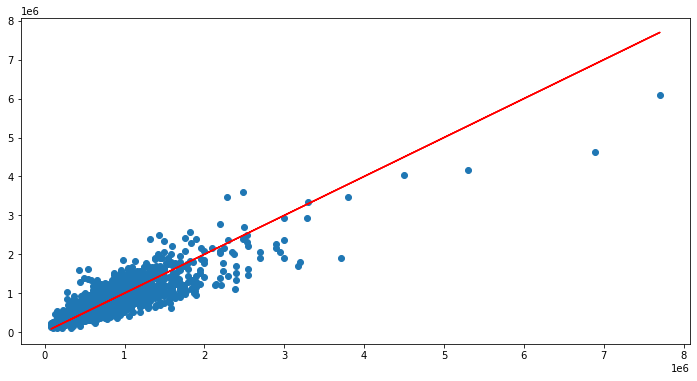

In [63]:
plt.figure(figsize = (12,6))
plt.scatter(Y_test,predictions)
plt.plot(Y_test,Y_test,'r')

In [64]:
single_house = df.drop('price',axis=1).iloc[0]

In [66]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [67]:
model.predict(single_house)

array([[289799.56]], dtype=float32)

In [68]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
